In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:

data=pd.read_csv('car_age_price.csv')
print(data)

     Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]


In [101]:
y=data['Price']

In [103]:
X=data.drop(['Price'],axis=1)

In [104]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [105]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


linear regression 1


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [107]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [108]:
model=lr.fit(X_train,y_train)

In [111]:
predictions=model.predict(X_test)


In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Prediction :- ", predictions)
print("MSE :- ",mean_squared_error(y_test,predictions))
print("MAE :- ",mean_absolute_error(y_test,predictions))
print("R2 SCORE :- ",r2_score(y_test,predictions))

Prediction :-  [609546.42181529 508618.99038334 559082.70609932 559082.70609932
 559082.70609932 407691.55895138 508618.99038334 559082.70609932
 609546.42181529 609546.42181529 306764.12751943 508618.99038334
 407691.55895138 660010.13753128 559082.70609932 609546.42181529
 306764.12751943 407691.55895138 508618.99038334 508618.99038334
 508618.99038334 508618.99038334 508618.99038334 508618.99038334
 508618.99038334 508618.99038334 407691.55895138 407691.55895138
 357227.8432354  407691.55895138 508618.99038334 609546.42181529
 559082.70609932 508618.99038334 508618.99038334 357227.8432354
 407691.55895138 508618.99038334 407691.55895138 407691.55895138
 458155.27466737 407691.55895138 660010.13753128 508618.99038334
 508618.99038334 357227.8432354  508618.99038334 458155.27466737
 508618.99038334 609546.42181529 407691.55895138 660010.13753128
 508618.99038334 508618.99038334 508618.99038334 508618.99038334]
MSE :-  3640901249.3320346
MAE :-  49513.74198063277
R2 SCORE :-  0.4794325

linear regression 2

In [120]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.5, random_state=42)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))
print(r2_score(y_test,predictions))

3640901249.3320346
49513.74198063277
0.479432543532763


lasso regression

In [121]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
print("MSE of lasso regression:-",mean_squared_error(y_test,predictions))
print("MAE of lasso regression:-",mean_absolute_error(y_test,predictions))
print("R2 SCORE of lasso regression:-",r2_score(y_test,predictions))
selected_features = lasso_model.coef_

year_2022 = 2022
price_2022 = lasso_model.predict([[year_2022]])[0]
print("Price in 2022 =",price_2022)

MSE of lasso regression:- 3640901249.3320346
MAE of lasso regression:- 49513.74198063277
R2 SCORE of lasso regression:- 0.479432543532763
Price in 2022 = 760935.3336846083


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


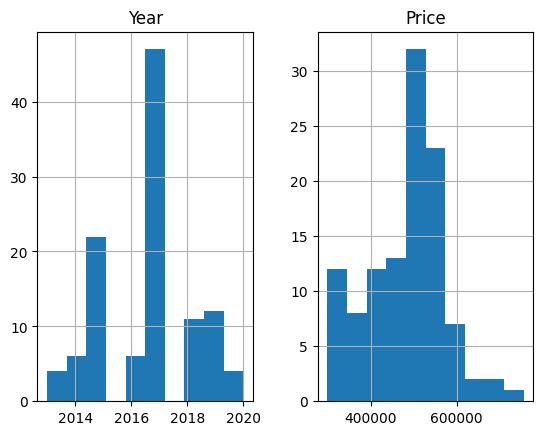

In [122]:
#Visualizing the data
data.hist()
plt.show()

1.Best linear relation between year and price

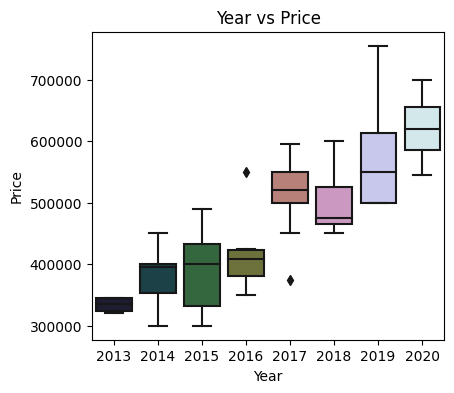

In [116]:
#Between year and Price
plt.figure(figsize=(10,4))

plt.subplot(1,2,2)
plt.title('Year vs Price')
sns.boxplot(x=data.Year, y=data.Price, palette=("cubehelix"))

plt.show()

F_onewayResult(statistic=23.47282491295477, pvalue=1.3141495962412486e-05)


(0.0, 777906.4986692877)

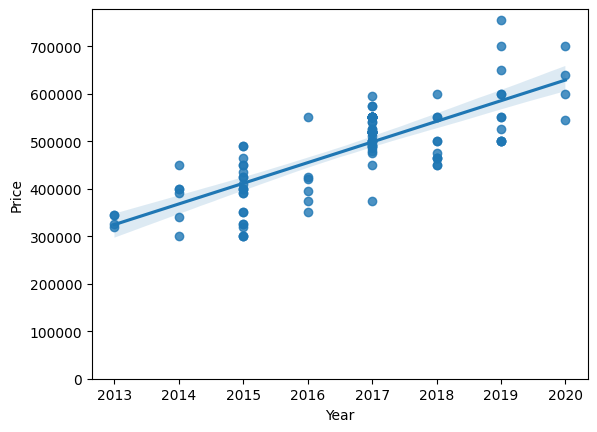

In [117]:
# Analysis of Variance
import scipy as sp

data_annova = data[['Year', 'Price']]
grouped_annova = data_annova.groupby(['Year'])
annova_results_l = sp.stats.f_oneway(
							grouped_annova.get_group(2017)['Price'],
							grouped_annova.get_group(2020)['Price']
									)
print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='Year', y ='Price', data = data)
plt.ylim(0, )


As the slope is increasing in a positive direction, it is a positive linear relationship.

2.Can you  predict the possible price of a 2022 model second-hand grand i10?

Receaving high MSE and MAE values, the result of prediction may be inaccurate. But the predicted value for **year 2022 is 760935.3336846083.**

3.Learn about lasso regression and create a model along with linear regression. Find out which one is performing better?

By comparing linear and lasso regression for the given data set , found that lasso regression is performing better.